<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

In [80]:
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("LaTeXStrings")
import Pkg; Pkg.add("Measures")

   Resolving package versions...


  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Project.toml`
  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Project.toml`
  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Manifest.toml`


   Resolving package versions...


  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Project.toml`
  No Changes to `~/Documents/SN/2A/Opti/projet-optinum/Manifest.toml`


# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [1]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    4      4  0.4s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [2]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false



Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  1.6s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

Expérimentations numériques à faire ici

Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

### **Question 1**
On calcule le gradient et la *Hessienne* de $f_1$ et on a,

$$
\begin{gather*}
    \nabla f_1 = \begin{bmatrix} 6 x_1 \\ 4 x_2 \\ 2 x_3 \end{bmatrix} \\
    H_{f_1} = \begin{bmatrix} 6 & 0 & 0 \\ 0 & 4 & 0 \\ 0 & 0 & 2 \end{bmatrix}
\end{gather*}
$$

d'où sont dévellopement de *Taylor* :

$$
    f_1 (x) \approx f_1(\bar{x}_0) + \nabla f_{1}^T (\bar{x}_0).\bar{x}_0 - \frac{1}{2} \bar{x}_{0}^T.H_{f_1}. \bar{x}_0 + \underbrace{\cancel{\frac{\partial H_{f_1}}{\partial x}}}_{= \ 0}
$$

La fonction $f_1$ est déjà sont propre dévelloppement de *Taylor* au $2^{nd}$ ordre car c'est une quadratique et la dérivée de sa *Hessienne* est nulle.

In [3]:
include("../src/Regions_De_Confiance.jl")
include("../src/newton.jl")
include("../test/fonctions_de_tests.jl")

# Point initial
x0 = [1; 0; 1]

# Pour l'algorithme de Newton
println("-------------------------------------------------------------------------")
printstyled("Temps pour l'algorithme de Newton :", bold=true, color=:blue)
GC.gc(true)
@time _, _, _, nb_iters_nw, _ = newton(fct1, grad_fct1, hess_fct1, x0)
printstyled("Nombre d'itérations pour l'algorithme de Newton : ", bold=true, color=:blue) 
println(nb_iters_nw)

#Pour l'algorithme des régions de confiance
println("-------------------------------------------------------------------------")
printstyled("Temps pour l'algorithme des régions de confiance :", bold=true, color=:blue)
GC.gc(true)
@time _, _, _, nb_iters_rc, _ = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas="cauchy")
printstyled("Nombre d'itérations pour l'algorithme des régions de confiance : ", bold=true, color=:blue) 
println(nb_iters_rc)

-------------------------------------------------------------------------
Temps pour l'algorithme de Newton :  0.958505 seconds (3.42 M allocations: 169.914 MiB, 3.80% gc time, 99.99% compilation time)


Nombre d'itérations pour l'algorithme de Newton : 1
-------------------------------------------------------------------------
Temps pour l'algorithme des régions de confiance :  0.329446 seconds (487.45 k allocations: 25.317 MiB, 99.98% compilation time)


Nombre d'itérations pour l'algorithme des régions de confiance : 12


Comme $f_1$ est quadratique, l'algorithme de *Newton* converge en une itération comme prévu. Dans ce cas l'algorithme de *Newton* est donc plus rapide que celui des régions de confiance.

### **Question 2**
Les autres paramètres qui peuvent avoir de l'influence sur les performances de l'algorithme sont $\gamma_1$, $\gamma_2$, $\eta_1$ et $\eta_2$.
Pour cela nous étudirons la fonction $f_2 \colon \mathbb{R}^2 \to \mathbb{R}$ en variant ces différents paramètres.

$$
    f_{2}(x_1,x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2.
$$

#### • Variations de $\gamma_1$ et $\gamma_2$

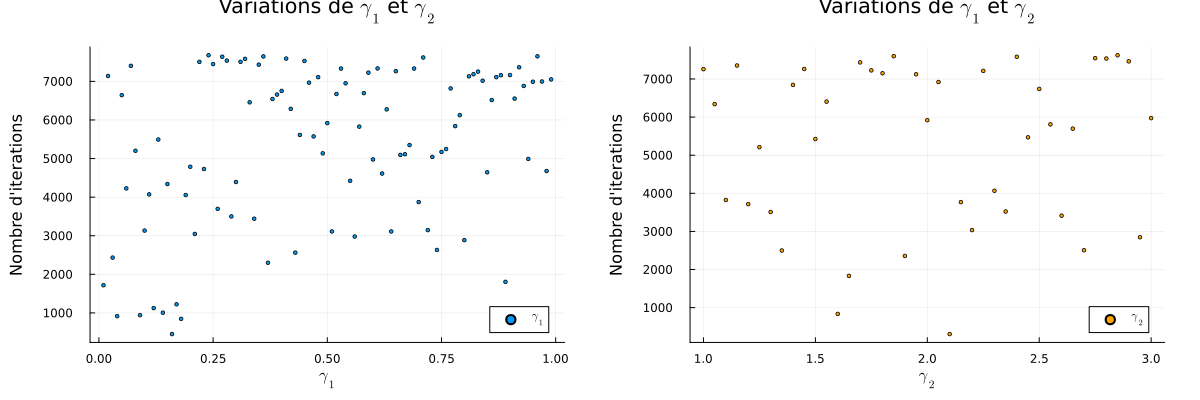

In [76]:
using Plots
using LaTeXStrings
using Measures
include("../test/fonctions_de_tests.jl")
include("../src/Regions_De_Confiance.jl")


# Initialisation
γ1 = 0.01
γ2 = 3

iters_1 = []
iters_2 =[]

γ_1 = []
γ_2 = []

# Point initial
x0 = [-1.2; 1]

# Variations de γ1
while γ1 < 1 
    _, _, _,nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "cauchy", max_iter = 10000, γ1 = γ1)
    push!(γ_1, γ1)
	push!(iters_1, nb_iters)
    γ1 += 0.01
end

# Variations de γ2
while γ2 > 1 
    _, _, _, nb_iters, _ = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "cauchy", max_iter = 10000, γ2 = γ2)
    push!(γ_2, γ2)
	push!(iters_2, nb_iters)
    γ2 -= 0.05
end

# Affichage des résultats
s1 = scatter(γ_1, iters_1, ms=2, label=L"\gamma_1")
xlabel!(L"$\gamma_1$")
s2 = scatter(γ_2, iters_2, ms=2, label=L"\gamma_2", mc=:orange)
xlabel!(L"$\gamma_2$")

scatter(s1, s2, layout=2, size=(1200,400), margin=7mm)
title!(L"Variations de $\gamma_1$ et $\gamma_2$")
ylabel!("Nombre d'iterations")

On ne remarque aucune tendance particulière lorsque $\gamma_1$ varie. Il en va de même pour $\gamma_2$, aucun point ne semble se démarquer.

#### • Variations de $\eta_1$

On décide ici de fixer $\eta_2 = 0.9$ d'après les résultats des tests réalisés plus loin.

-------------------------------------------------------------------------
Résultats de : RC et cauchy avec η1 = 0.8 et η2 = 0.9, appliqué à f2:
  * x0       = 

[-1.2, 1.0]
  * x_sol    = [0.999992127279009, 0.9999849460426689]
  * f(x_sol) = 1.0978626681579075e-10
  * nb_iters = 313
  * flag     = 2
  * solution = 

[1, 1]
-------------------------------------------------------------------------
Résultats de : RC et cauchy avec η1 = 0.6 et η2 = 0.9, appliqué à f2:
  * x0       = [-1.2, 1.0]
  * x_sol    = [0.9998249074463061, 0.9996490014103386]
  * f(x_sol) = 3.072865953830387e-8
  * nb_iters = 3438
  * flag     = 2
  * solution = [1, 1]


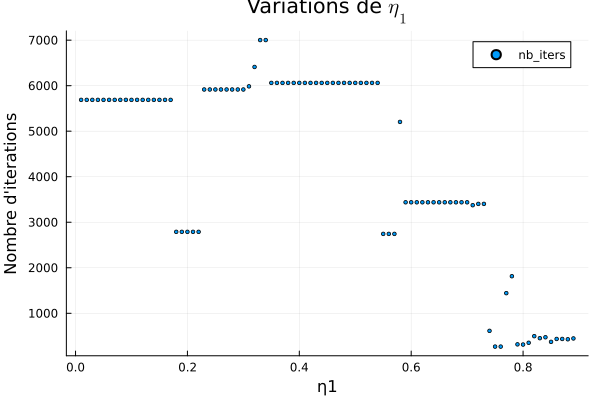

In [5]:
using Plots
using LaTeXStrings
include("../test/fonctions_de_tests.jl")
include("../src/Regions_De_Confiance.jl")

# Point inital
x0 = [-1.2; 1]

# Test de la solution trouvée pour η1 = 0.8
x_sol, f_sol, flag, nb_iters = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas="cauchy", η1 = 0.8, η2 = 0.9)
afficher_resultats("RC et " * "cauchy avec η1 = 0.8 et η2 = 0.9,", "f2", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
@test x_sol ≈ sol_exacte_fct2 atol=1e-2

# Test de la solution trouvée pour η1 = 0.6
x_sol, f_sol, flag, nb_iters = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas="cauchy", η1 = 0.6, η2 = 0.9)
afficher_resultats("RC et " * "cauchy avec η1 = 0.6 et η2 = 0.9,", "f2", x0, x_sol, f_sol, flag, nb_iters, sol_exacte_fct2)
@test x_sol ≈ sol_exacte_fct2 atol=1e-2


# Initialisation des variables
η1 = 0.01
η2 = 0.9
iters = []
η = []

# Varations de η1 (η2 fixé)
while η1 < η2 
    _, _, _, nb_iters = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "cauchy", max_iter = 10000, η1 = η1, η2 = η2)
    push!(η, η1)
	push!(iters, nb_iters)
    η1 += 0.01
end

# Affichage des résultats
scatter(η, iters, title = L"Variations de $\eta_1$", label = "nb_iters", ms=2)
xlabel!("η1")
ylabel!("Nombre d'iterations")

On remarque qu'il existe des valeurs de $\eta_1$ pour lequelle l'algorithme converge plus vite ($\eta_1$ = 0.8 par exemple), d'ailleur il semble que plus $\eta_1$ se rapprochée de 1 moins il y a d'itération. 

#### • Variations de $\eta_2$

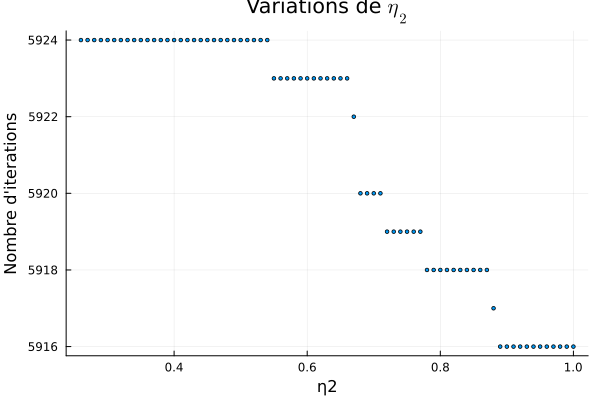

In [6]:
using Plots
using LaTeXStrings
include("../test/fonctions_de_tests.jl")
include("../src/Regions_De_Confiance.jl")

# Point initial
x0 = [-1.2; 1]

# Initialisation des variables
η2 = 1
iters = []
η = []

# Variations de η2
while η2 > 0.25
    _, _, _, nb_iters = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "cauchy", max_iter = 10000, η2 = η2)
    push!(η, η2)
	push!(iters, nb_iters)
    η2 -= 0.01
end

# Affichage des résultats
s1 = scatter(η, iters, ms=2, title=L"Variations de $\eta_2$", label=false)

scatter(s1, label = "nb_iters", ms=2)
xlabel!("η2")
ylabel!("Nombre d'iterations")

De plus on voit que si on augmente $\eta_2$ le nombre d'itération diminue mais la varaition est trop faible pour être significative. On prendra tout de même un valeur proche de 1 pour $\eta_2$.

#### • Variation de $\eta_1$ et $\eta_2$

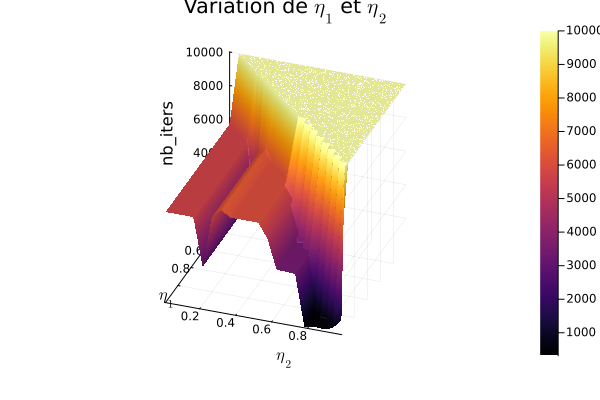

In [77]:
using Plots; gr()
using LaTeXStrings
include("../test/fonctions_de_tests.jl")
include("../src/Regions_De_Confiance.jl")

# Point initial
x0 = [-1.2; 1]

# Initialisation des variables
iters = []
n = 20
η1 = range(0.01, 0.99, n)
η2 = range(0.99, 0.01, n)
η_1 = @. []
η_2 = @. []

for i = η1, j = η2
    if i > j
        push!(iters, 10000)
        push!(η_1, i)
        push!(η_2, j)
    else
        _, _, _, nb_iters = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas = "cauchy", max_iter = 10000, η1 = i, η2 = j)
        push!(iters, nb_iters)
        push!(η_1, i)
        push!(η_2, j)
    end
end

plot3d(η_2, η_1, iters, st=:surface, xlabel=L"\eta_1", ylabel=L"\eta_2", zlabel="nb_iters", camera=(110,30))
title!(L"Variation de $\eta_1$ et $\eta_2$")

Finalement, on remarque que pour des valeurs de $\eta_1$ et $\eta_2$ proches de 1. Les résultats obtenus sont bien cohérent avec ceux obtenus précédament.

# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [8]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [9]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false



Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.5s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

### Questions 1, 2 & 3

-------------------------------------------------------------------------


Nombre d'itérations pour l'algorithme des régions de confiance avec pas de Cauchy: 864
-------------------------------------------------------------------------
Nombre d'itérations pour l'algorithme des régions de confiance avec GCT en une itération: 

864
-------------------------------------------------------------------------
Nombre d'itérations pour l'algorithme des régions de confiance avec GCT: 44


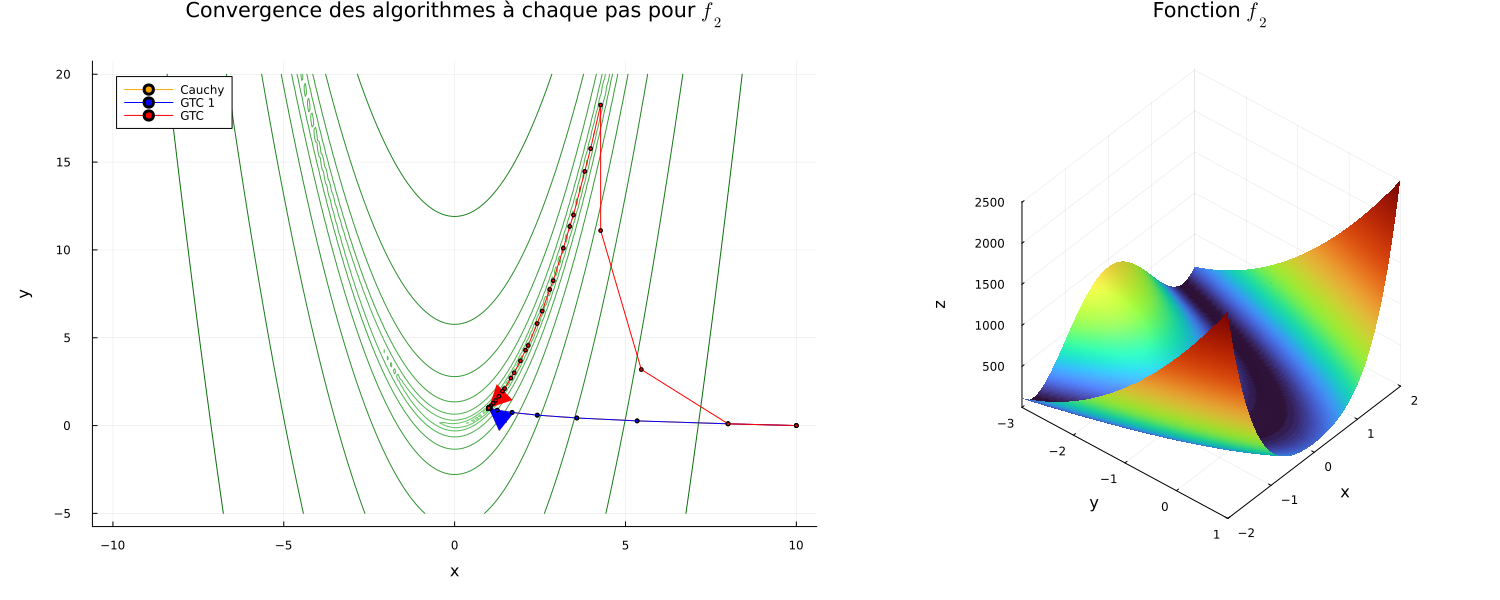

In [71]:
using Plots
using LaTeXStrings
using Measures
include("../test/fonctions_de_tests.jl")
include("../src/Regions_De_Confiance.jl")

f2(x,y)=100*(y-x^2)^2+(1-x)^2

x = range(-10, 10, length=200)
y = range(-5, 20, length=200)
z = @. f2(x',y)

x0 = [10; 0]


# Pour l'algorithme de des régions de confiance avec pas de Cauchy
println("-------------------------------------------------------------------------")
_, _, _, nb_iters_c, xs_cauchy = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, algo_pas="cauchy")
printstyled("Nombre d'itérations pour l'algorithme des régions de confiance avec pas de Cauchy: ", bold=true, color=:blue) 
println(nb_iters_c)

#Pour l'algorithme des régions de confiance avec GCT en une itération
println("-------------------------------------------------------------------------")
_, _, _, nb_iters_gct_1, xs_gct_1 = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0, max_iter_gct=1)
printstyled("Nombre d'itérations pour l'algorithme des régions de confiance avec GCT en une itération: ", bold=true, color=:blue)
println(nb_iters_gct_1)

#Pour l'algorithme des régions de confiance avec GCT
println("-------------------------------------------------------------------------")
_, _, _, nb_iters_gct, xs_gct = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0)
printstyled("Nombre d'itérations pour l'algorithme des régions de confiance avec GCT: ", bold=true, color=:blue)
println(nb_iters_gct)


function get_ranges(v::Vector, f::Function)
    x = [v[i][1] for i in 1:length(v)]
    y = [v[j][2] for j in 1:length(v)]
    z = @. f(x',y)
    return x, y, z
end

xc = get_ranges(xs_cauchy, f2)
xgct1 = get_ranges(xs_gct_1, f2)
xgct = get_ranges(xs_gct, f2)

l = @layout [a{0.6w} b{0.4w}]
colorf = cgrad(:turbo, scale = :exp)

p1 = contour(x, y, log10.(z), color=:greens, levels=12, xlabel="x", ylabel="y")
plot!(xc[1],xc[2], color=:orange, label="Cauchy", arrow=(:closed, 1), marker=:circle, ms=2)
plot!(xgct1[1],xgct1[2], color=:blue, label="GTC 1", arrow=(:closed, 1), marker=:circle, ms=2)
plot!(xgct[1], xgct[2], color=:red, label="GTC", arrow=(:closed, 1), marker=:circle, ms=2)
title!(L"Convergence des algorithmes à chaque pas pour $f_2$")

u = range(-2, 2, length=100)
v = range(-1, 3, length=200)
z = @. f2(u,v')
p2 = plot3d(-v, u, z, st=:surface, xlabel="y", ylabel="x", zlabel="z", camera=(40,40), title=L"Fonction $f_2$", color=colorf)

plot(p1, p2, layout=l, size=(1500,600), cbar=false, margin=10mm)

On remarque que lorsque nous forçons le gradient conjugué tronqué à une seule itération, il converge plus lentement que dans le cas où il est limité à $2 n$ itérations et correspond même au *Pas de Cauchy*, c'est-à-dire qu'il se déplace perpendiculairement aux courbes de niveau.

De manière général la méthode du gradient conjugué tronqué réalise moins d'itération que le *Pas de Cauchy*, car il a la possibilité de travailler dans plusieurs direction à la fois. Il est tout de même plus complexe à mettre en place mais dans les 2 cas les algorithmes donnent des solutions justes.

#### Autre exemple :

On décide ici de voir la convergence des différents algorithmes pour la paraboloïde suivante
$$
\begin{gather*}
    f \colon \mathbb{R}^2 \to \mathbb{R} \\
    (x_1,x_2) \mapsto {\left( \frac{x_1}{a} \right)}^2 + {\left( \frac{x_2}{b} \right)}^2
\end{gather*}
$$

avec $a = 2$ et $b = \frac{5}{4}$

-------------------------------------------------------------------------


Nombre d'itérations pour l'algorithme des régions de confiance avec pas de Cauchy: 18
-------------------------------------------------------------------------
Nombre d'itérations pour l'algorithme des régions de confiance avec GCT: 3


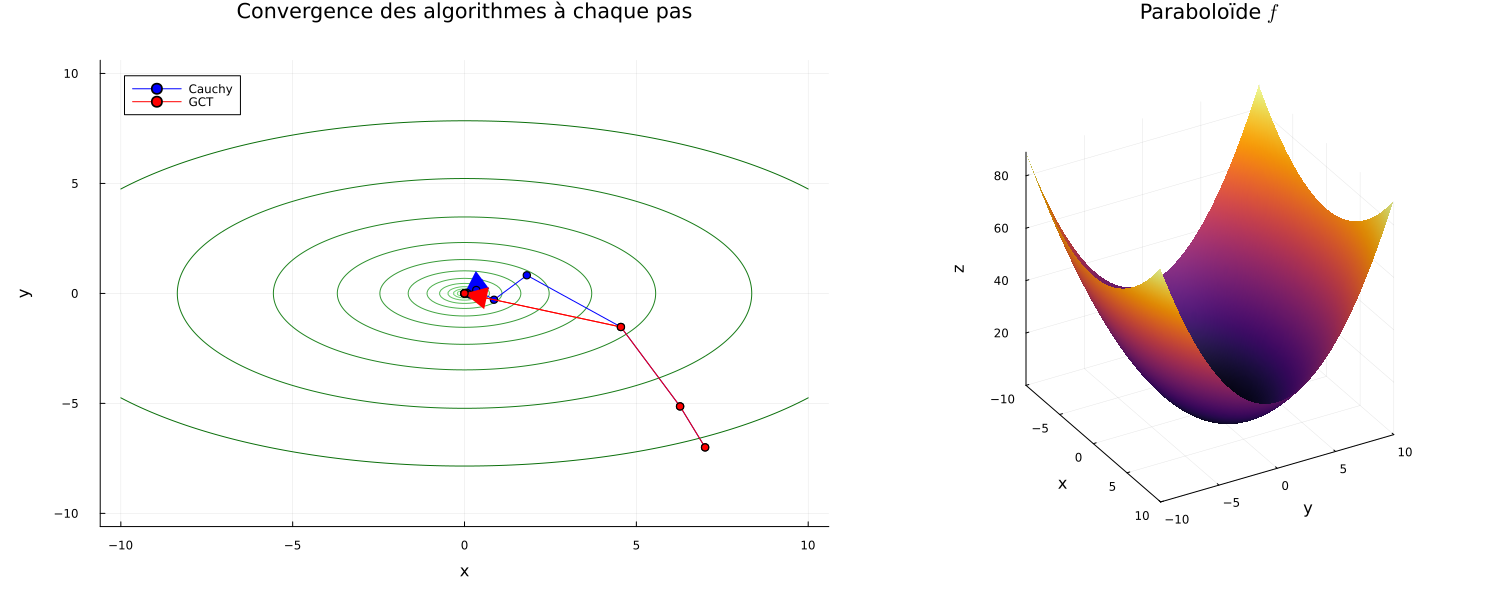

In [79]:
using Plots
using Measures
using LaTeXStrings
include("../src/Regions_De_Confiance.jl")
GC.gc()

f2(x,y)=(x * 0.5)^2 + (y * 0.8)^2

f(x)=(x[1] * 0.5)^2 + (x[2] * 0.8)^2
gradf(x) = [x[1]*0.5  ; x[2]*1.28]
hessf(x) = [0.5 0; 0 1.28]

x = range(-10, 10, length=200)
y = range(-10, 10, length=200)
z = @. f2(x',y)

x0 = [7; -7]


# Pour l'algorithme de des régions de confiance avec pas de Cauchy
println("-------------------------------------------------------------------------")
_, _, _, nb_iters_c, xs_cauchy = regions_de_confiance(f, gradf, hessf, x0, algo_pas="cauchy")
printstyled("Nombre d'itérations pour l'algorithme des régions de confiance avec pas de Cauchy: ", bold=true, color=:blue) 
println(nb_iters_c)

#Pour l'algorithme des régions de confiance avec GCT
println("-------------------------------------------------------------------------")
x_sol, _, _, nb_iters_gct, xs_gct = regions_de_confiance(f, gradf, hessf, x0)
printstyled("Nombre d'itérations pour l'algorithme des régions de confiance avec GCT: ", bold=true, color=:blue)
println(nb_iters_gct)


function get_ranges(v::Vector, f::Function)
    x = [v[i][1] for i in 1:length(v)]
    y = [v[j][2] for j in 1:length(v)]
    z = @. f(x',y)
    return x, y, z
end

xc = get_ranges(xs_cauchy, f2)
xgct = get_ranges(xs_gct, f2)


l = @layout [a{0.6w} b{0.4w}]

p1 = contour(x, y, log10.(z), color=:greens, levels=12)
plot!(xc[1],xc[2], color=:blue, label="Cauchy", arrow=(:closed, 1), marker=:circle)
plot!(xgct[1], xgct[2], color=:red, label="GCT", arrow=(:closed, 1), marker=:circle)
title!("Convergence des algorithmes à chaque pas")
xlabel!("x")
ylabel!("y")

p2 = plot3d(x, y, z, st=:surface, xlabel="x", ylabel="y", zlabel="z", camera=(60,30), title=L"Paraboloïde $f$")

plot(p1, p2, layout=l, size=(1500,600), cbar=false, margin=10mm)

On voit donc plus clairement ici que GCT converge plus rapidement vers une solution.